# CAB Investment Firm Analysis: 

<br>

In [14]:
# importing libraries and packages:

import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from tabulate import tabulate
js = "<script>$('.output_scroll').removeClass('output_scroll')</script>"
display(HTML(js))


%matplotlib inline
sb.set_style("darkgrid")

# Data Set of City:

In [15]:
city=pd.read_csv("E:\DataGlacier Internship Work\Week1 and 2 Data Glacier Cab Investment company\City.csv")
city

City   Population      Users
0        NEW YORK NY   8,405,837    302,149 
1         CHICAGO IL   1,955,130    164,468 
2     LOS ANGELES CA   1,595,037    144,132 
3           MIAMI FL   1,339,155     17,675 
4     SILICON VALLEY   1,177,609     27,247 
5      ORANGE COUNTY   1,030,185     12,994 
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14  SAN FRANCISCO CA     629,591    213,609 
15     SACRAMENTO CA     545,776      7,044 
16     PITTSBURGH PA     542,085      3,643 
17     WASHINGTON DC     418,859    127,001 
18      NASHVILLE TN     327,225      9,270 
19         BOSTON MA     248,968     80,021

In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
#turning the columns users and population into  numeric
city['Users']=city['Users'].replace('"', '')
city['Population']=city['Population'].replace('"', '')

city['Users']=city['Users'].replace(',', '', regex=True).astype(int)
city['Population']=city['Population'].replace(',', '', regex=True).astype(int)

In [18]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


In [19]:
# creating a new column to calculate the percentage of user per city

city['User %'] = (city['Users'] / 
                  city['Users'].sum()) * 100
city

City  Population   Users     User %
0        NEW YORK NY     8405837  302149  23.414907
1         CHICAGO IL     1955130  164468  12.745377
2     LOS ANGELES CA     1595037  144132  11.169447
3           MIAMI FL     1339155   17675   1.369717
4     SILICON VALLEY     1177609   27247   2.111495
5      ORANGE COUNTY     1030185   12994   1.006964
6       SAN DIEGO CA      959307   69995   5.424232
7         PHOENIX AZ      943999    6133   0.475274
8          DALLAS TX      942908   22157   1.717047
9         ATLANTA GA      814885   24701   1.914193
10         DENVER CO      754233   12421   0.962560
11         AUSTIN TX      698371   14978   1.160714
12        SEATTLE WA      671238   25063   1.942246
13         TUCSON AZ      631442    5712   0.442649
14  SAN FRANCISCO CA      629591  213609  16.553538
15     SACRAMENTO CA      545776    7044   0.545872
16     PITTSBURGH PA      542085    3643   0.282313
17     WASHINGTON DC      418859  127001   9.841888
18      NASHVILLE TN      327225    9270   0.718375
19         BOSTON MA      248968   80021   6.201193

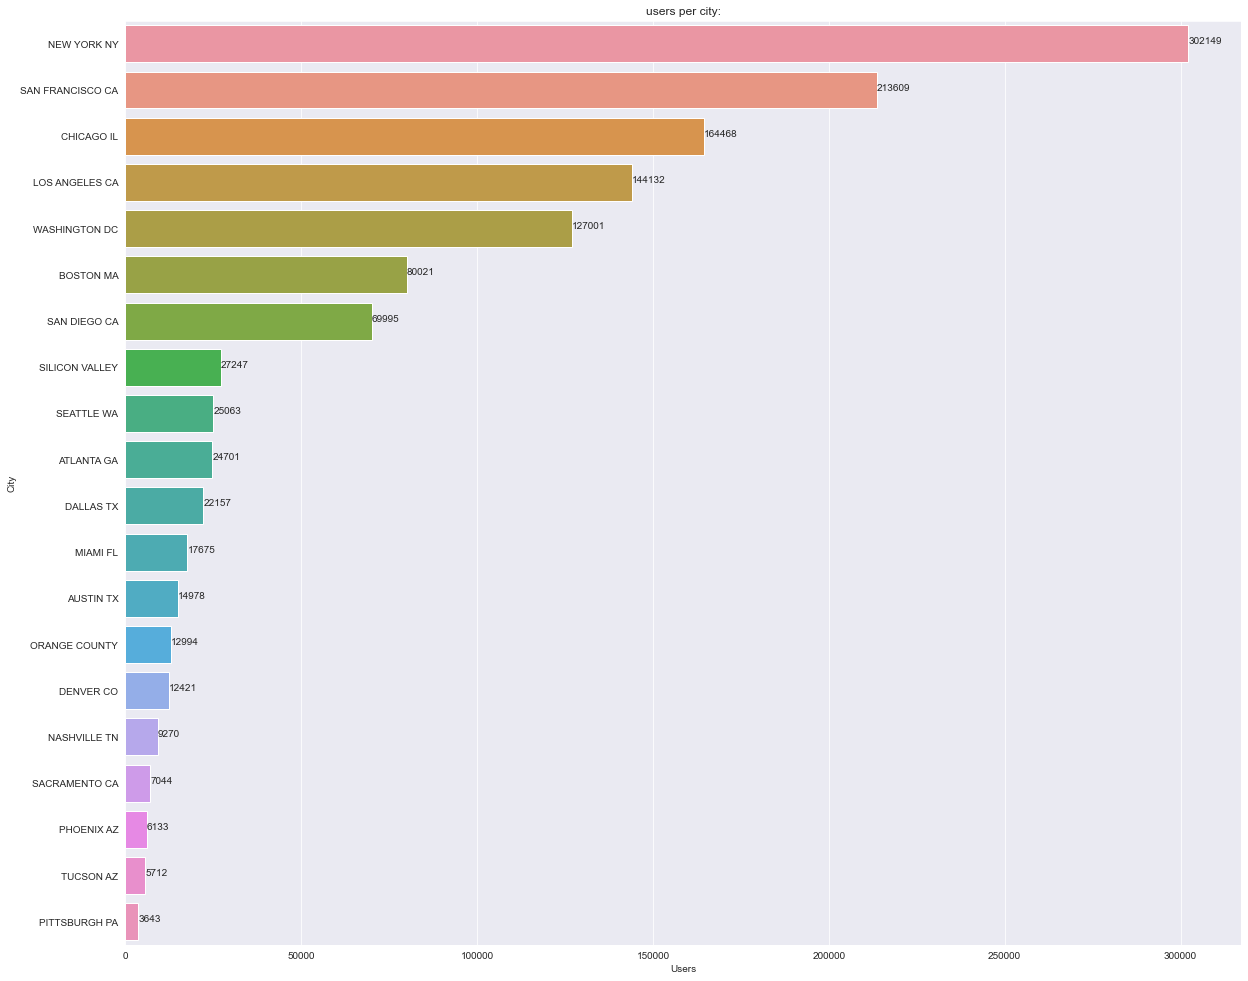

In [20]:
# checking users per city
users_per_city=pd.DataFrame(city.groupby("City")["Users"].sum().sort_values(ascending=False))
users_per_city.reset_index(inplace=True)

plt.figure(figsize=(20, 17));
g=sb.barplot(x="Users", y="City", data=users_per_city);
for i, v in enumerate(users_per_city.Users):
    g.text(v, i, str(int(v)))
plt.title('users per city:');

Newyork is the most populated city and it also has most number of users for cabs!

<AxesSubplot:title={'center':' Users Of Cab In Each City'}, ylabel='Users'>

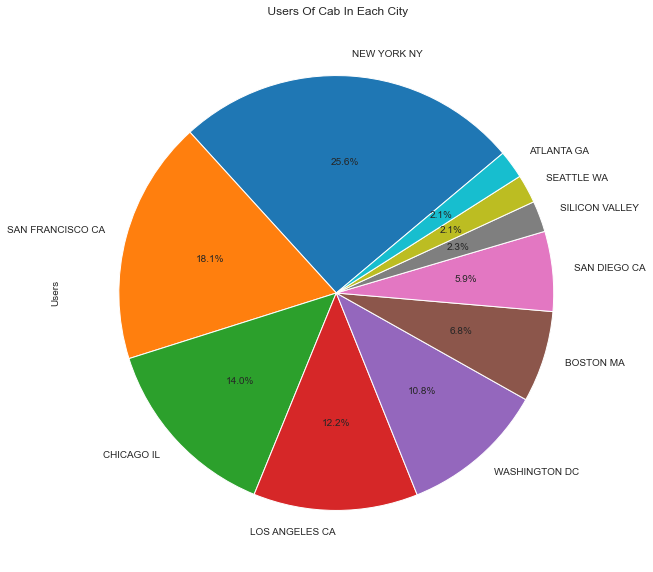

In [21]:
# city by users
plt.title(" Users Of Cab In Each City")
city.groupby("City")["Users"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

The diagram shows the top 10 cities with highest number of cab users starting from Newyork to Atlanta.

<br>

# Cab Data Set below:

In [22]:
cab=pd.read_csv("E:\DataGlacier Internship Work\Week1 and 2 Data Glacier Cab Investment company\Cab_Data.csv")
cab

Transaction ID  Date of Travel     Company           City  \
0             10000011           42377    Pink Cab     ATLANTA GA   
1             10000012           42375    Pink Cab     ATLANTA GA   
2             10000013           42371    Pink Cab     ATLANTA GA   
3             10000014           42376    Pink Cab     ATLANTA GA   
4             10000015           42372    Pink Cab     ATLANTA GA   
...                ...             ...         ...            ...   
359387        10440101           43108  Yellow Cab  WASHINGTON DC   
359388        10440104           43104  Yellow Cab  WASHINGTON DC   
359389        10440105           43105  Yellow Cab  WASHINGTON DC   
359390        10440106           43105  Yellow Cab  WASHINGTON DC   
359391        10440107           43102  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04         125.20       97.6320  
3              33.17         377.40      351.6020  
4               8.73         114.62       97.7760  
...              ...            ...           ...  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192  

[359392 rows x 7 columns]

In [23]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [24]:
print(cab.shape)

(359392, 7)


In [25]:
cab.describe().T

count          mean            std         min  \
Transaction ID  359392.0  1.022076e+07  126805.803715  10000011.0   
Date of Travel  359392.0  4.296407e+04     307.467197     42371.0   
KM Travelled    359392.0  2.256725e+01      12.233526         1.9   
Price Charged   359392.0  4.234433e+02     274.378911        15.6   
Cost of Trip    359392.0  2.861901e+02     157.993661        19.0   

                         25%          50%           75%          max  
Transaction ID  1.011081e+07  10221035.50  1.033094e+07  10440107.00  
Date of Travel  4.269700e+04     42988.00  4.323200e+04     43465.00  
KM Travelled    1.200000e+01        22.44  3.296000e+01        48.00  
Price Charged   2.064375e+02       386.36  5.836600e+02      2048.03  
Cost of Trip    1.512000e+02       282.48  4.136832e+02       691.20

In [26]:
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

No missing data in the cab dataset

<br>

# Transaction Data Set:

In [27]:
trans_data=pd.read_csv("E:\DataGlacier Internship Work\Week1 and 2 Data Glacier Cab Investment company\Transaction_ID.csv")
trans_data

Transaction ID  Customer ID Payment_Mode
0             10000011        29290         Card
1             10000012        27703         Card
2             10000013        28712         Cash
3             10000014        28020         Cash
4             10000015        27182         Card
...                ...          ...          ...
440093        10440104        53286         Cash
440094        10440105        52265         Cash
440095        10440106        52175         Card
440096        10440107        52917         Card
440097        10440108        51587         Card

[440098 rows x 3 columns]

In [28]:
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [29]:
print(trans_data.shape)

(440098, 3)


In [30]:
trans_data.describe().T

count          mean            std         min  \
Transaction ID  440098.0  1.022006e+07  127045.493722  10000011.0   
Customer ID     440098.0  2.361951e+04   21195.549816         1.0   

                        25%         50%          75%         max  
Transaction ID  10110035.25  10220059.5  10330083.75  10440108.0  
Customer ID         3530.00     15168.0     43884.00     60000.0

In [31]:
trans_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

No missing data in the transaction data

In [32]:
# doing inner join between tarnsaction and Cab data set on transaction id below:

transData_cab_data = pd.merge(trans_data, cab, on=["Transaction ID"])
transData_cab_data

Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10000012        27703         Card           42375    Pink Cab   
2             10000013        28712         Cash           42371    Pink Cab   
3             10000014        28020         Cash           42376    Pink Cab   
4             10000015        27182         Card           42372    Pink Cab   
...                ...          ...          ...             ...         ...   
359387        10440101        52392         Cash           43108  Yellow Cab   
359388        10440104        53286         Cash           43104  Yellow Cab   
359389        10440105        52265         Cash           43105  Yellow Cab   
359390        10440106        52175         Card           43105  Yellow Cab   
359391        10440107        52917         Card           43102  Yellow Cab   

                 City  KM Travelled  Price Charged  Cost of Trip  
0          ATLANTA GA         30.45         370.95      313.6350  
1          ATLANTA GA         28.62         358.52      334.8540  
2          ATLANTA GA          9.04         125.20       97.6320  
3          ATLANTA GA         33.17         377.40      351.6020  
4          ATLANTA GA          8.73         114.62       97.7760  
...               ...           ...            ...           ...  
359387  WASHINGTON DC          4.80          69.24       63.3600  
359388  WASHINGTON DC          8.40         113.75      106.8480  
359389  WASHINGTON DC         27.75         437.07      349.6500  
359390  WASHINGTON DC          8.80         146.19      114.0480  
359391  WASHINGTON DC         12.76         191.58      177.6192  

[359392 rows x 9 columns]

In [33]:
transData_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Customer ID     359392 non-null  int64  
 2   Payment_Mode    359392 non-null  object 
 3   Date of Travel  359392 non-null  int64  
 4   Company         359392 non-null  object 
 5   City            359392 non-null  object 
 6   KM Travelled    359392 non-null  float64
 7   Price Charged   359392 non-null  float64
 8   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 27.4+ MB


In [34]:
print(transData_cab_data.shape)

(359392, 9)


<br>

# Customer Data set below:

In [35]:
customer_data=pd.read_csv("E:\DataGlacier Internship Work\Week1 and 2 Data Glacier Cab Investment company\Customer_ID.csv")
customer_data

Customer ID  Gender  Age  Income (USD/Month)
0            29290    Male   28               10813
1            27703    Male   27                9237
2            28712    Male   53               11242
3            28020    Male   23               23327
4            27182    Male   33                8536
...            ...     ...  ...                 ...
49166        12490    Male   33               18713
49167        14971    Male   30               15346
49168        41414    Male   38                3960
49169        41677    Male   23               19454
49170        39761  Female   32               10128

[49171 rows x 4 columns]

In [36]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [37]:
print(customer_data.shape)

(49171, 4)


In [38]:
customer_data.describe().T

count          mean           std     min      25%  \
Customer ID         49171.0  28398.252283  17714.137333     1.0  12654.5   
Age                 49171.0     35.363121     12.599066    18.0     25.0   
Income (USD/Month)  49171.0  15015.631856   8002.208253  2000.0   8289.5   

                        50%      75%      max  
Customer ID         27631.0  43284.5  60000.0  
Age                    33.0     42.0     65.0  
Income (USD/Month)  14656.0  21035.0  35000.0

In [39]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

No missing data in the customer dataset

In [40]:
# doing inner join between transcab and customer data set on customer id below:


GlobalData_cab_data= pd.merge(transData_cab_data, customer_data, on=["Customer ID"])
GlobalData_cab_data

Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10351127        29290         Cash           43302  Yellow Cab   
2             10412921        29290         Card           43427  Yellow Cab   
3             10000012        27703         Card           42375    Pink Cab   
4             10320494        27703         Card           43211  Yellow Cab   
...                ...          ...          ...             ...         ...   
359387        10439790        38520         Card           43107  Yellow Cab   
359388        10439799        12490         Cash           43103  Yellow Cab   
359389        10439838        41414         Card           43104  Yellow Cab   
359390        10439840        41677         Cash           43106  Yellow Cab   
359391        10439846        39761         Card           43104  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95      313.6350    Male   
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
3           ATLANTA GA         28.62         358.52      334.8540    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)  
0        28               10813  
1        28               10813  
2        28               10813  
3        27                9237  
4        27                9237  
...     ...                 ...  
359387   42               19417  
359388   33               18713  
359389   38                3960  
359390   23               19454  
359391   32               10128  

[359392 rows x 12 columns]

<br>

# Global Data Set:

In [41]:
GlobalData_cab_data

Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10351127        29290         Cash           43302  Yellow Cab   
2             10412921        29290         Card           43427  Yellow Cab   
3             10000012        27703         Card           42375    Pink Cab   
4             10320494        27703         Card           43211  Yellow Cab   
...                ...          ...          ...             ...         ...   
359387        10439790        38520         Card           43107  Yellow Cab   
359388        10439799        12490         Cash           43103  Yellow Cab   
359389        10439838        41414         Card           43104  Yellow Cab   
359390        10439840        41677         Cash           43106  Yellow Cab   
359391        10439846        39761         Card           43104  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95      313.6350    Male   
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
3           ATLANTA GA         28.62         358.52      334.8540    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)  
0        28               10813  
1        28               10813  
2        28               10813  
3        27                9237  
4        27                9237  
...     ...                 ...  
359387   42               19417  
359388   33               18713  
359389   38                3960  
359390   23               19454  
359391   32               10128  

[359392 rows x 12 columns]

In [42]:
print(GlobalData_cab_data.shape)

(359392, 12)


In [43]:
GlobalData_cab_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB


In [44]:
GlobalData_cab_data[GlobalData_cab_data.duplicated()]

Empty DataFrame
Columns: [Transaction ID, Customer ID, Payment_Mode, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip, Gender, Age, Income (USD/Month)]
Index: []

No duplicate rows data

In [45]:
GlobalData_cab_data.describe().T

count          mean            std         min  \
Transaction ID      359392.0  1.022076e+07  126805.803715  10000011.0   
Customer ID         359392.0  1.919165e+04   21012.412463         1.0   
Date of Travel      359392.0  4.296407e+04     307.467197     42371.0   
KM Travelled        359392.0  2.256725e+01      12.233526         1.9   
Price Charged       359392.0  4.234433e+02     274.378911        15.6   
Cost of Trip        359392.0  2.861901e+02     157.993661        19.0   
Age                 359392.0  3.533670e+01      12.594234        18.0   
Income (USD/Month)  359392.0  1.504882e+04    7969.409482      2000.0   

                             25%          50%           75%          max  
Transaction ID      1.011081e+07  10221035.50  1.033094e+07  10440107.00  
Customer ID         2.705000e+03      7459.00  3.607800e+04     60000.00  
Date of Travel      4.269700e+04     42988.00  4.323200e+04     43465.00  
KM Travelled        1.200000e+01        22.44  3.296000e+01        48.00  
Price Charged       2.064375e+02       386.36  5.836600e+02      2048.03  
Cost of Trip        1.512000e+02       282.48  4.136832e+02       691.20  
Age                 2.500000e+01        33.00  4.200000e+01        65.00  
Income (USD/Month)  8.424000e+03     14685.00  2.103500e+04     35000.00

# Global Cab data set and data visualization:


C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


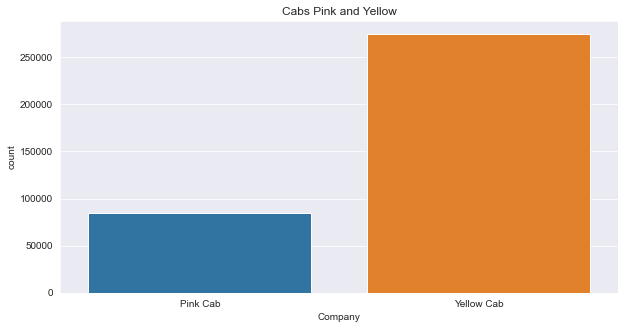

In [47]:
# making graph for the number of pink and yellow cab users to visulaize data set

plt.figure(figsize=(10,5))
sb.countplot(GlobalData_cab_data.Company)
plt.title("Cabs Pink and Yellow")
plt.show()

From 2016 to 2018, most cab users travelled with Yellow Cab company than Pink cab

In [48]:
# creating a new colum "Profit" which is the difference between the price charged and cost of trip

GlobalData_cab_data['Profit']=GlobalData_cab_data['Price Charged']-GlobalData_cab_data['Cost of Trip']
GlobalData_cab_data

Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10351127        29290         Cash           43302  Yellow Cab   
2             10412921        29290         Card           43427  Yellow Cab   
3             10000012        27703         Card           42375    Pink Cab   
4             10320494        27703         Card           43211  Yellow Cab   
...                ...          ...          ...             ...         ...   
359387        10439790        38520         Card           43107  Yellow Cab   
359388        10439799        12490         Cash           43103  Yellow Cab   
359389        10439838        41414         Card           43104  Yellow Cab   
359390        10439840        41677         Cash           43106  Yellow Cab   
359391        10439846        39761         Card           43104  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95      313.6350    Male   
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
3           ATLANTA GA         28.62         358.52      334.8540    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)    Profit  
0        28               10813   57.3150  
1        28               10813  281.2772  
2        28               10813  194.6480  
3        27                9237   23.6660  
4        27                9237  253.9808  
...     ...                 ...       ...  
359387   42               19417   47.2656  
359388   33               18713  105.0980  
359389   38                3960   71.2100  
359390   23               19454   21.8600  
359391   32               10128   64.3020  

[359392 rows x 13 columns]

In [49]:
# Grouping Customer's age:

labels = ["{0} - {1}".format(i, i + 9) for i in range(10, 70, 10)]

GlobalData_cab_data["Age group"] = pd.cut(GlobalData_cab_data.Age, range(10,75, 10), right=False, labels=labels)
GlobalData_cab_data

Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10351127        29290         Cash           43302  Yellow Cab   
2             10412921        29290         Card           43427  Yellow Cab   
3             10000012        27703         Card           42375    Pink Cab   
4             10320494        27703         Card           43211  Yellow Cab   
...                ...          ...          ...             ...         ...   
359387        10439790        38520         Card           43107  Yellow Cab   
359388        10439799        12490         Cash           43103  Yellow Cab   
359389        10439838        41414         Card           43104  Yellow Cab   
359390        10439840        41677         Cash           43106  Yellow Cab   
359391        10439846        39761         Card           43104  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95      313.6350    Male   
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
3           ATLANTA GA         28.62         358.52      334.8540    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)    Profit Age group  
0        28               10813   57.3150   20 - 29  
1        28               10813  281.2772   20 - 29  
2        28               10813  194.6480   20 - 29  
3        27                9237   23.6660   20 - 29  
4        27                9237  253.9808   20 - 29  
...     ...                 ...       ...       ...  
359387   42               19417   47.2656   40 - 49  
359388   33               18713  105.0980   30 - 39  
359389   38                3960   71.2100   30 - 39  
359390   23               19454   21.8600   20 - 29  
359391   32               10128   64.3020   30 - 39  

[359392 rows x 14 columns]

C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


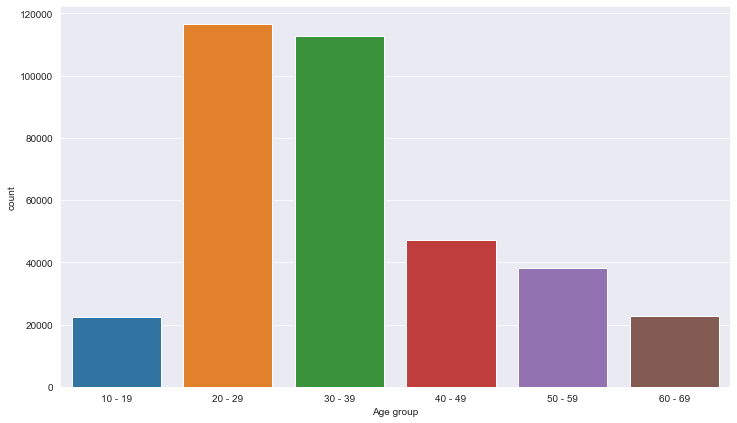

In [50]:
plt.figure(figsize=(12,7))
sb.countplot(GlobalData_cab_data["Age group"])
plt.show()

Most cab users are between the age of 20 to 39

In [51]:
def plot_figure2(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.bar(stacked = True, figsize = (x,y),width=0.5)
    xt = plt.xticks(rotation=0)
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
#         width=width*5
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

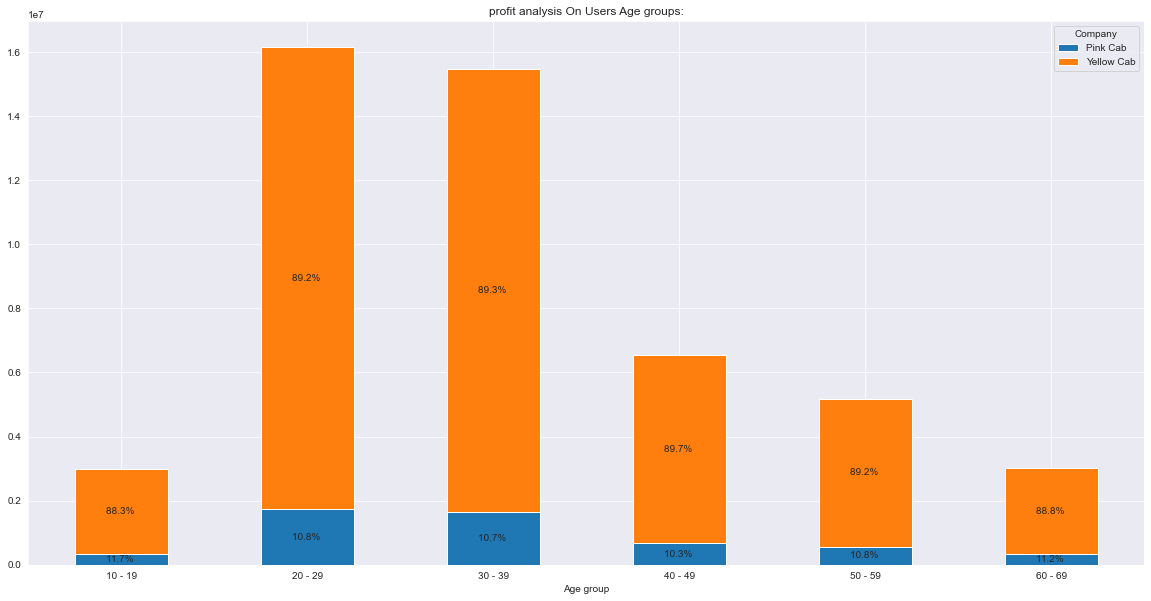

In [53]:
pivot_age_profit = GlobalData_cab_data.pivot_table(index = ["Age group"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure2(pivot_age_profit, "profit analysis On Users Age groups:",0.45,20,10)

C:\Pyhton 3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


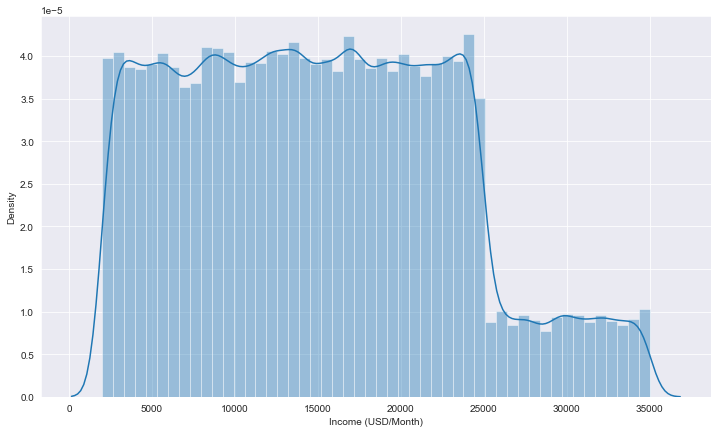

In [54]:
plt.figure(figsize=(12,7))
sb.distplot(GlobalData_cab_data['Income (USD/Month)'])
plt.show()

Most users have an income that ranges from 2500 to 24000 per month


In [55]:
labelz = ["{0} - {1}".format(i, i + 3000) for i in range(2000, 35000, 5000)]

GlobalData_cab_data["Income grouped"] = pd.cut(GlobalData_cab_data['Income (USD/Month)'], range(2000,40000, 5000), right=False, labels=labelz)
GlobalData_cab_data

Transaction ID  Customer ID Payment_Mode  Date of Travel     Company  \
0             10000011        29290         Card           42377    Pink Cab   
1             10351127        29290         Cash           43302  Yellow Cab   
2             10412921        29290         Card           43427  Yellow Cab   
3             10000012        27703         Card           42375    Pink Cab   
4             10320494        27703         Card           43211  Yellow Cab   
...                ...          ...          ...             ...         ...   
359387        10439790        38520         Card           43107  Yellow Cab   
359388        10439799        12490         Cash           43103  Yellow Cab   
359389        10439838        41414         Card           43104  Yellow Cab   
359390        10439840        41677         Cash           43106  Yellow Cab   
359391        10439846        39761         Card           43104  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95      313.6350    Male   
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
3           ATLANTA GA         28.62         358.52      334.8540    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)    Profit Age group Income grouped  
0        28               10813   57.3150   20 - 29   7000 - 10000  
1        28               10813  281.2772   20 - 29   7000 - 10000  
2        28               10813  194.6480   20 - 29   7000 - 10000  
3        27                9237   23.6660   20 - 29   7000 - 10000  
4        27                9237  253.9808   20 - 29   7000 - 10000  
...     ...                 ...       ...       ...            ...  
359387   42               19417   47.2656   40 - 49  17000 - 20000  
359388   33               18713  105.0980   30 - 39  17000 - 20000  
359389   38                3960   71.2100   30 - 39    2000 - 5000  
359390   23               19454   21.8600   20 - 29  17000 - 20000  
359391   32               10128   64.3020   30 - 39   7000 - 10000  

[359392 rows x 15 columns]

C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


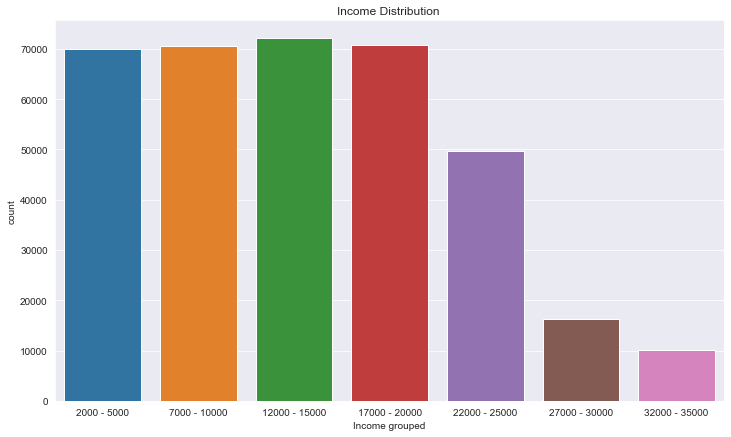

In [56]:
# making chart for income:

plt.figure(figsize=(12,7))
sb.countplot(GlobalData_cab_data["Income grouped"],palette="tab10")
plt.title("Income Distribution ")
plt.show()

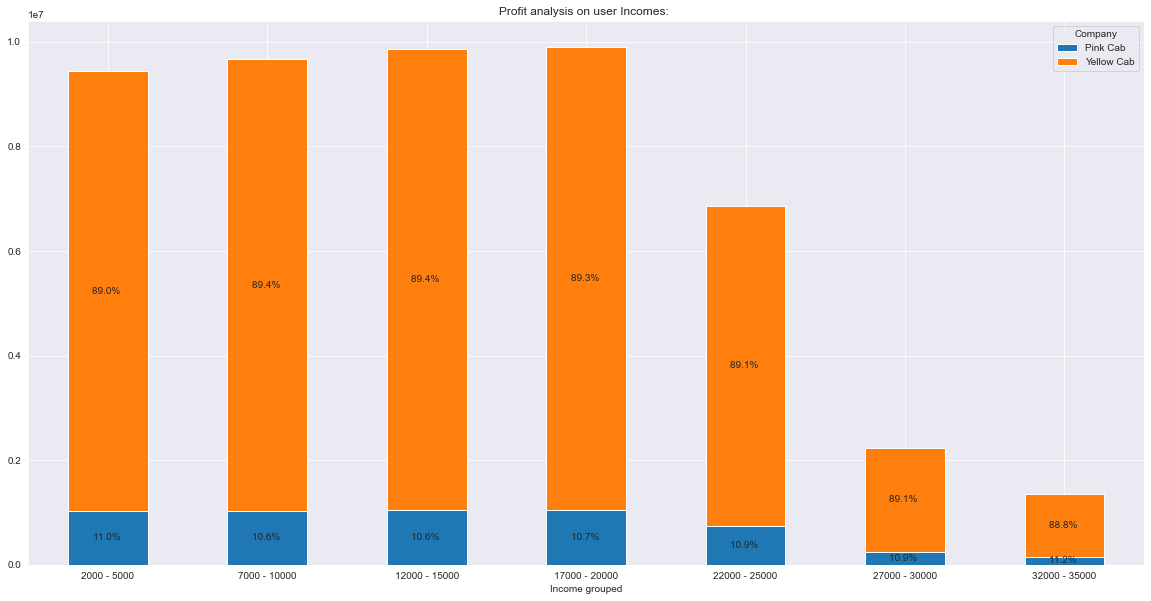

In [57]:
pivot_income_profit = GlobalData_cab_data.pivot_table(index = ["Income grouped"], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure2(pivot_income_profit, "Profit analysis on user Incomes: ",0.45,20,10)

Yellow cab company made more profit based on users incomes.


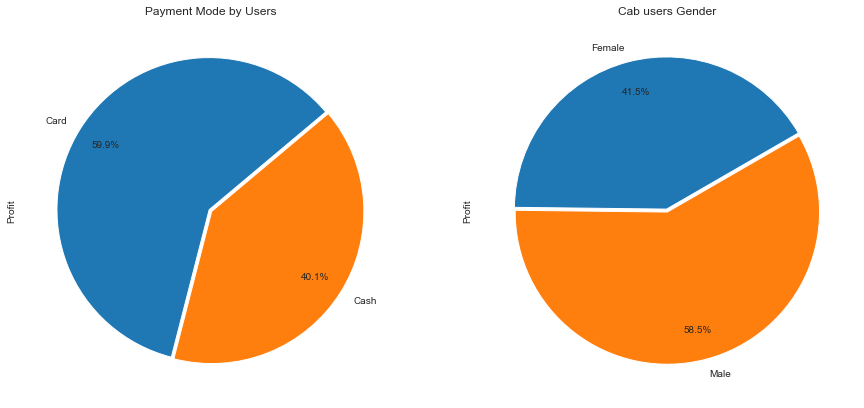

In [58]:
# customer payment mode and gender charts:


plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Payment Mode by Users')
GlobalData_cab_data.groupby('Payment_Mode')['Profit'].sum().plot(kind='pie',y='Payment_Mode',startangle=40,figsize=(15,7),autopct='%1.1f%%',explode=[0.01]*2,pctdistance=0.8)

plt.subplot(1,2,2)
plt.title('Cab users Gender')
GlobalData_cab_data.groupby('Gender')['Profit'].sum().plot(kind='pie',y='GENDER',startangle=30,figsize=(15,7),autopct='%1.1f%%',explode=[0.01]*2,pctdistance=0.8)
plt.show()

Most cab users are male, they are 57.3% of the total user and prefer paying with Card which represent 60% .

C:\Pyhton 3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Pyhton 3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


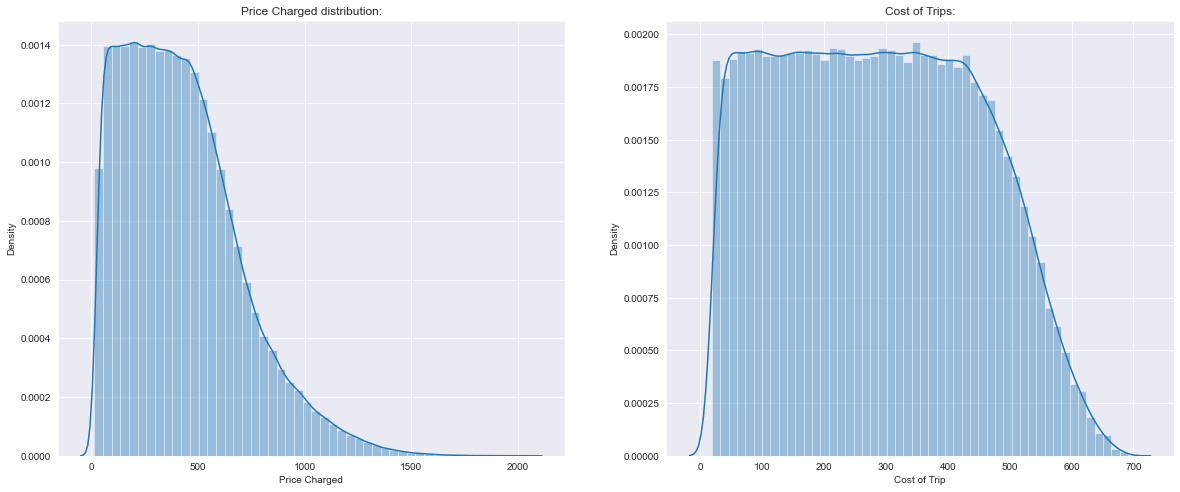

In [59]:
#data visualization of the prices from the global data set

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Charged distribution:')
sb.distplot(GlobalData_cab_data['Price Charged'])

plt.subplot(1,2,2)
plt.title('Cost of Trips:')
sb.distplot(GlobalData_cab_data['Cost of Trip'])
plt.show()

There is presence of outliers in the distributions, hence This distributions show that there is a clear difference between the actual cost of trip and the priced charged by both companies.


C:\Pyhton 3.10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


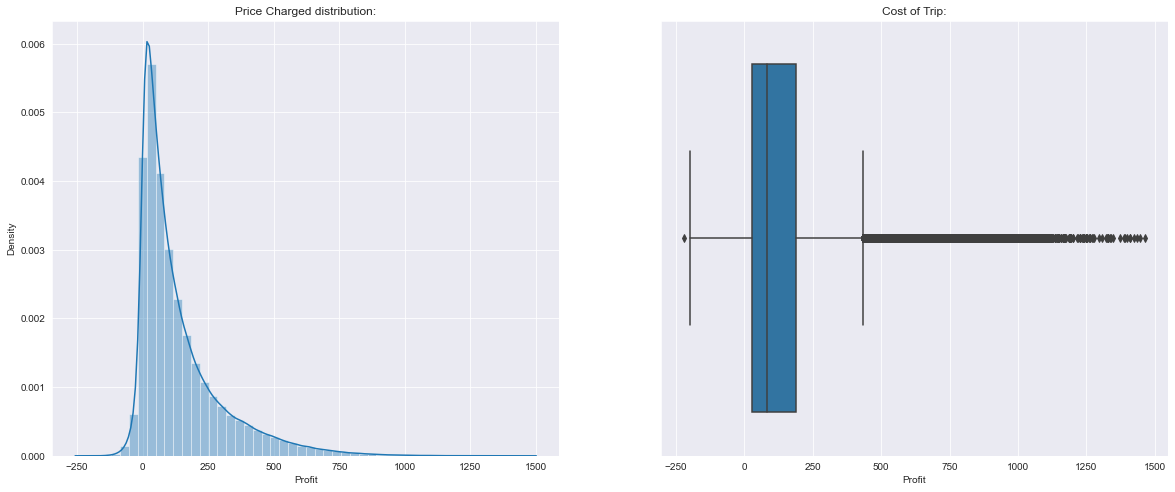

In [60]:
#visualizing the profit from the global data set

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Price Charged distribution:')
sb.distplot(GlobalData_cab_data['Profit'])

plt.subplot(1,2,2)
plt.title('Cost of Trip:')
sb.boxplot(GlobalData_cab_data['Profit'])
plt.show()

There is presence of outliers in the distributions.

<AxesSubplot:title={'center':' PROFIT PER COMPANY '}, ylabel='Profit'>

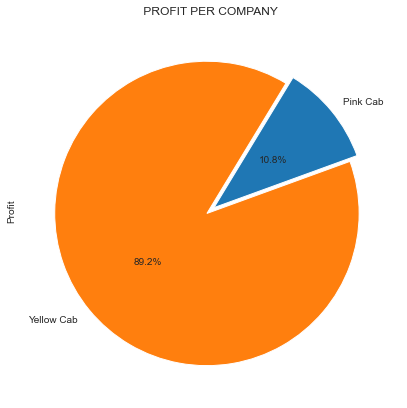

In [61]:
# chart of Profit per company:
plt.title(" PROFIT PER COMPANY ")
GlobalData_cab_data.groupby('Company')['Profit'].sum().plot(kind='pie',y='Company',startangle=20,figsize=(15,7),autopct='%1.1f%%',explode=[0.03]*2,pctdistance=0.5)

Yellow cab Company made 89.2% of the total profit and Pink cab only 10.8% of total profit.


In [62]:
# changing the Ms excel serial number into real Date:

GlobalData_cab_data['Date of Travel'] = GlobalData_cab_data['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))


# Extracting the month and year from the travel date column and year column

GlobalData_cab_data['Travel_year_Month'] = pd.to_datetime(GlobalData_cab_data['Date of Travel']).dt.to_period('M')
GlobalData_cab_data['Travel_year']=pd.DatetimeIndex(GlobalData_cab_data['Date of Travel']).year
GlobalData_cab_data['Travel_month']=pd.DatetimeIndex(GlobalData_cab_data['Date of Travel']).month
GlobalData_cab_data

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0             10000011        29290         Card     2016-01-08    Pink Cab   
1             10351127        29290         Cash     2018-07-21  Yellow Cab   
2             10412921        29290         Card     2018-11-23  Yellow Cab   
3             10000012        27703         Card     2016-01-06    Pink Cab   
4             10320494        27703         Card     2018-04-21  Yellow Cab   
...                ...          ...          ...            ...         ...   
359387        10439790        38520         Card     2018-01-07  Yellow Cab   
359388        10439799        12490         Cash     2018-01-03  Yellow Cab   
359389        10439838        41414         Card     2018-01-04  Yellow Cab   
359390        10439840        41677         Cash     2018-01-06  Yellow Cab   
359391        10439846        39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95      313.6350    Male   
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
3           ATLANTA GA         28.62         358.52      334.8540    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)    Profit Age group Income grouped  \
0        28               10813   57.3150   20 - 29   7000 - 10000   
1        28               10813  281.2772   20 - 29   7000 - 10000   
2        28               10813  194.6480   20 - 29   7000 - 10000   
3        27                9237   23.6660   20 - 29   7000 - 10000   
4        27                9237  253.9808   20 - 29   7000 - 10000   
...     ...                 ...       ...       ...            ...   
359387   42               19417   47.2656   40 - 49  17000 - 20000   
359388   33               18713  105.0980   30 - 39  17000 - 20000   
359389   38                3960   71.2100   30 - 39    2000 - 5000   
359390   23               19454   21.8600   20 - 29  17000 - 20000   
359391   32               10128   64.3020   30 - 39   7000 - 10000   

       Travel_year_Month  Travel_year  Travel_month  
0                2016-01         2016             1  
1                2018-07         2018             7  
2                2018-11         2018            11  
3                2016-01         2016             1  
4                2018-04         2018             4  
...                  ...          ...           ...  
359387           2018-01         2018             1  
359388           2018-01         2018             1  
359389           2018-01         2018             1  
359390           2018-01         2018             1  
359391           2018-01         2018             1  

[359392 rows x 18 columns]

C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


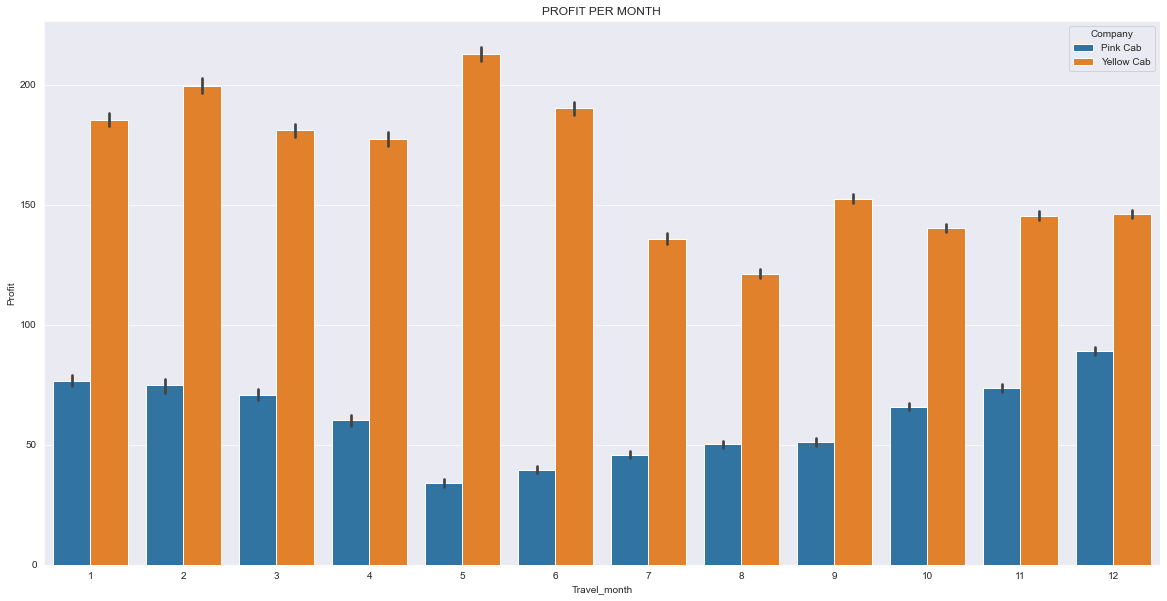

In [63]:
# Visualizing the profit by year and month

plt.figure(figsize=(20,10))
ax=sb.barplot(GlobalData_cab_data['Travel_month'],GlobalData_cab_data['Profit'],hue="Company",data=GlobalData_cab_data)
# xt = plt.xticks(rotation=70)
plt.title("PROFIT PER MONTH")
plt.show()

<Figure size 1440x720 with 0 Axes>

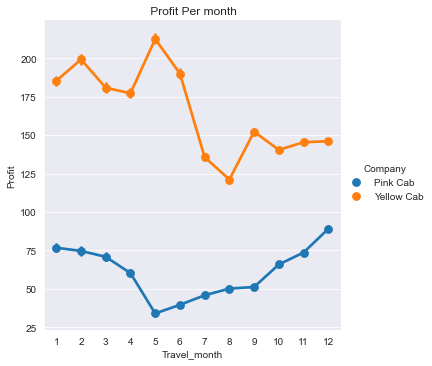

In [64]:
plt.figure(figsize=(20,10))
sb.catplot(x="Travel_month",
            y="Profit",
            hue="Company",
            kind="point", 
            data=GlobalData_cab_data)
plt.title(" Profit Per month")

plt.show()

C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'RIDES PER MONTH')

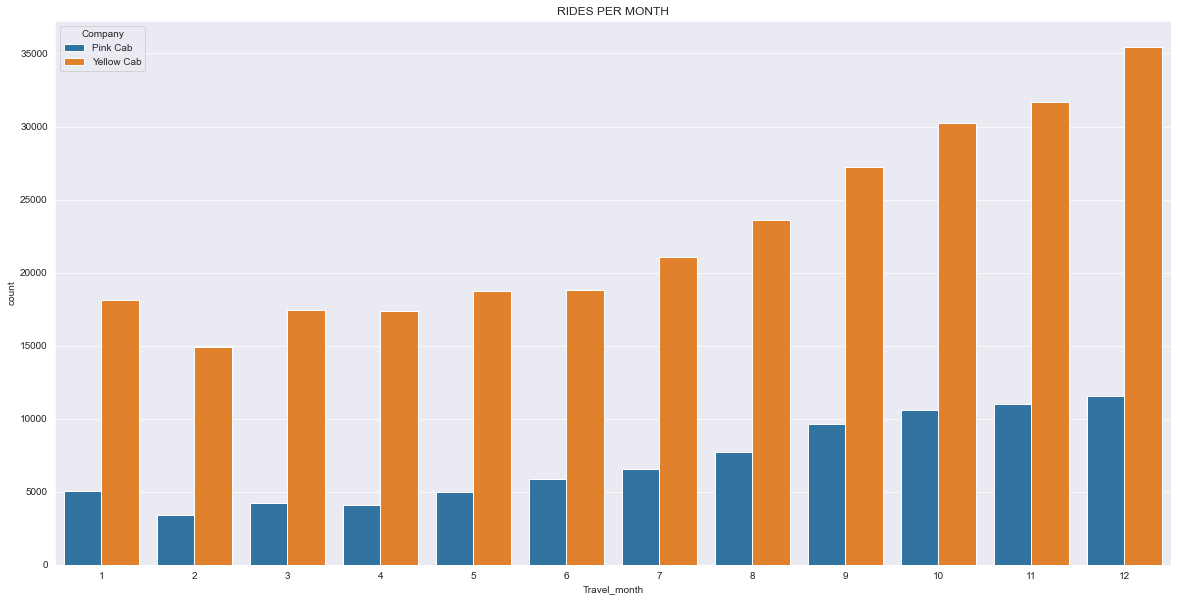

In [65]:
plt.figure(figsize=(20,10))
sb.countplot(GlobalData_cab_data['Travel_month'],hue="Company",data=GlobalData_cab_data)
plt.title("RIDES PER MONTH")

In [66]:
def plot_figure3(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
#     ax.xticks(rotation=30)
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label =  " " + str(pivot_table.loc[i][j].astype('int64')) + ""
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

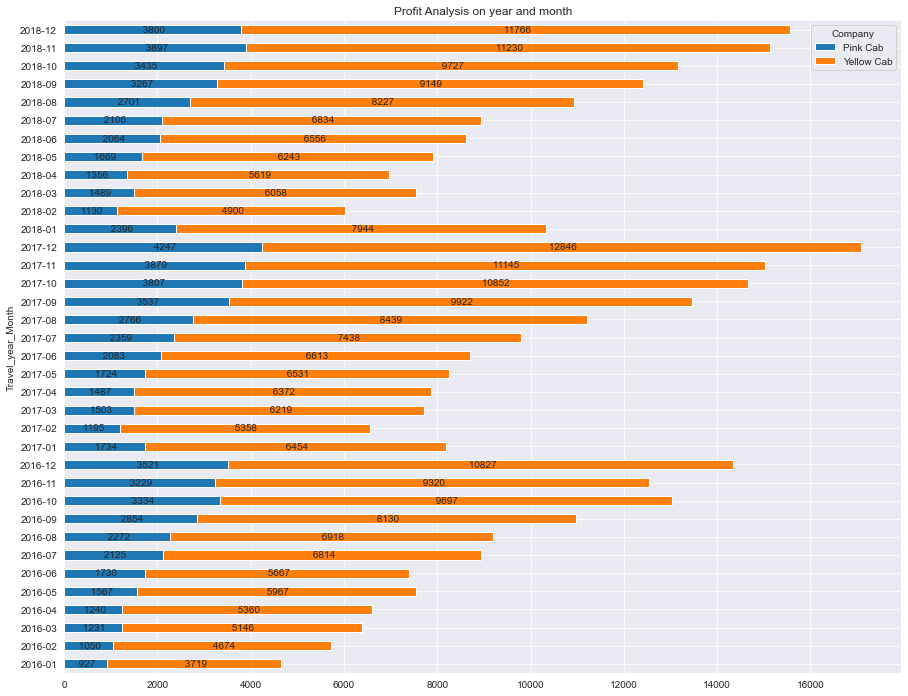

In [67]:
Travel_yearMonth_data = GlobalData_cab_data.pivot_table(index = ['Travel_year_Month'], columns = 'Company', values = 'Profit', aggfunc = 'count')
plot_figure3(Travel_yearMonth_data, "Profit Analysis on year and month",15,15,12)

The profit gained by both companies is high at the end of each year

In [68]:
#a function

def plot_figure(pivot_table, title, xpos,x,y):
    pivot_table.fillna(0, inplace=True)
    ax = pivot_table.plot.barh(stacked = True, figsize = (x,y))
    labels = []
    for j in pivot_table.columns:
        for i in pivot_table.index:
            if ((j == 0) and (pivot_table.loc[i][j] < 10) and (pivot_table.loc[i][j] < sum(pivot_table.loc[i]))):
                label = ""
            else:                                                                                                                       
                label = str(round((pivot_table.loc[i][j]/sum(pivot_table.loc[i]))*100,1)) + "% "
            labels.append(label)
    
    patches = ax.patches
    for label, rect in zip(labels, patches):
        width = rect.get_width()
        if width > 0:
            x = rect.get_x()
            y = rect.get_y()
            height = rect.get_height()

            if width>xpos: 
                ax.text(x + width/2, y + height/2., label, ha='center', va='center')
            else:
                ax.text(x + xpos, y + height/2., label, ha='center', va='center')
    plt.title(title)
    plt.show()

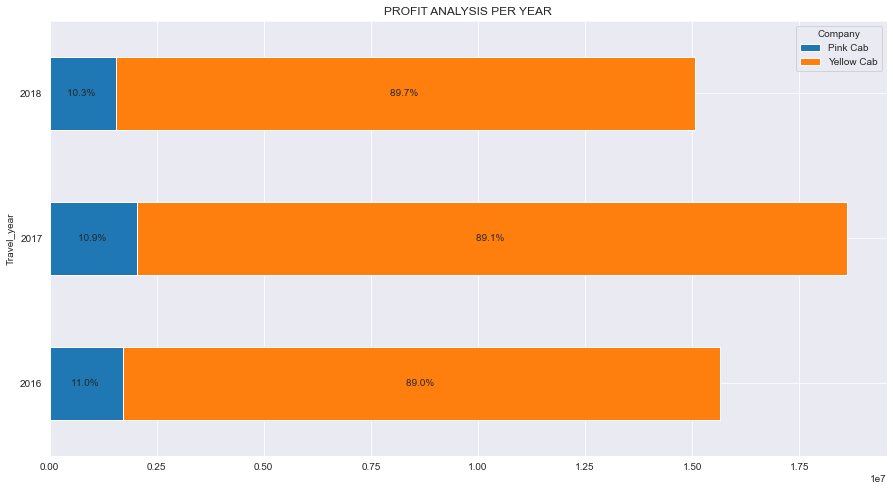

In [69]:
pivot_year_profit = GlobalData_cab_data.pivot_table(index = ['Travel_year'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure(pivot_year_profit, "PROFIT ANALYSIS PER YEAR",10,15,8)

This chart allow us to see that each year, Yellow cab company makes closely 90% of the total profit of both companies

C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PROFIT PER KM TRAVELLED')

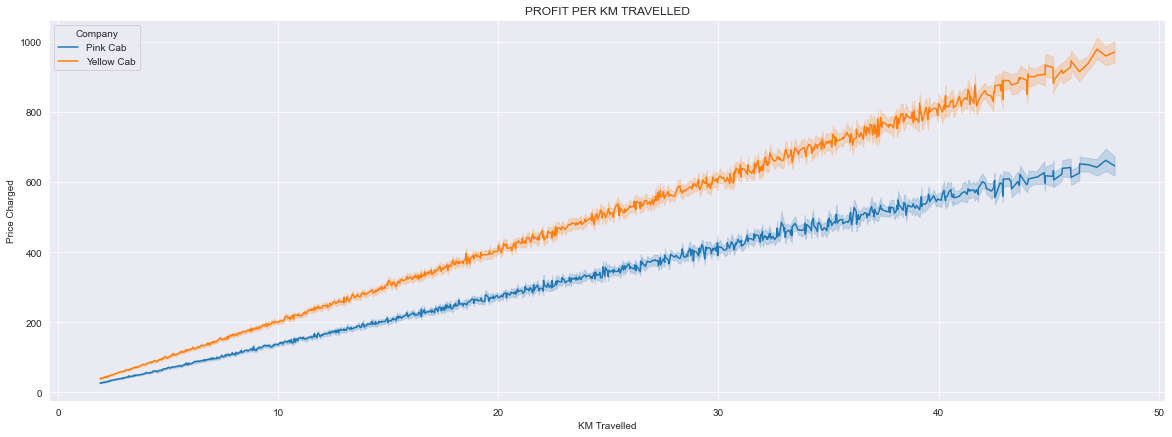

In [70]:
# KM TRAVELLED AND  and PRICE CHARGED

plt.figure(figsize=(20,7))
sb.lineplot(GlobalData_cab_data['KM Travelled'],GlobalData_cab_data['Price Charged'],hue="Company",data=GlobalData_cab_data)
plt.title("PROFIT PER KM TRAVELLED")

The longer the KM travelled the higher the price charges from both company howerver the Yellow cab company charged higher than the Pink cab company

In [71]:
# lets group the KM traveled

label = ["{0} - {1}".format(i, i + 9) for i in range(0, 50, 10)]

GlobalData_cab_data["KM_grouped"] = pd.cut(GlobalData_cab_data['KM Travelled'], range(0,55, 10), right=False, labels=label)
GlobalData_cab_data

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
0             10000011        29290         Card     2016-01-08    Pink Cab   
1             10351127        29290         Cash     2018-07-21  Yellow Cab   
2             10412921        29290         Card     2018-11-23  Yellow Cab   
3             10000012        27703         Card     2016-01-06    Pink Cab   
4             10320494        27703         Card     2018-04-21  Yellow Cab   
...                ...          ...          ...            ...         ...   
359387        10439790        38520         Card     2018-01-07  Yellow Cab   
359388        10439799        12490         Cash     2018-01-03  Yellow Cab   
359389        10439838        41414         Card     2018-01-04  Yellow Cab   
359390        10439840        41677         Cash     2018-01-06  Yellow Cab   
359391        10439846        39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95      313.6350    Male   
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
3           ATLANTA GA         28.62         358.52      334.8540    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)    Profit Age group Income grouped  \
0        28               10813   57.3150   20 - 29   7000 - 10000   
1        28               10813  281.2772   20 - 29   7000 - 10000   
2        28               10813  194.6480   20 - 29   7000 - 10000   
3        27                9237   23.6660   20 - 29   7000 - 10000   
4        27                9237  253.9808   20 - 29   7000 - 10000   
...     ...                 ...       ...       ...            ...   
359387   42               19417   47.2656   40 - 49  17000 - 20000   
359388   33               18713  105.0980   30 - 39  17000 - 20000   
359389   38                3960   71.2100   30 - 39    2000 - 5000   
359390   23               19454   21.8600   20 - 29  17000 - 20000   
359391   32               10128   64.3020   30 - 39   7000 - 10000   

       Travel_year_Month  Travel_year  Travel_month KM_grouped  
0                2016-01         2016             1    30 - 39  
1                2018-07         2018             7    20 - 29  
2                2018-11         2018            11    40 - 49  
3                2016-01         2016             1    20 - 29  
4                2018-04         2018             4    30 - 39  
...                  ...          ...           ...        ...  
359387           2018-01         2018             1    10 - 19  
359388           2018-01         2018             1    10 - 19  
359389           2018-01         2018             1    10 - 19  
359390           2018-01         2018             1      0 - 9  
359391           2018-01         2018             1    10 - 19  

[359392 rows x 19 columns]

C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


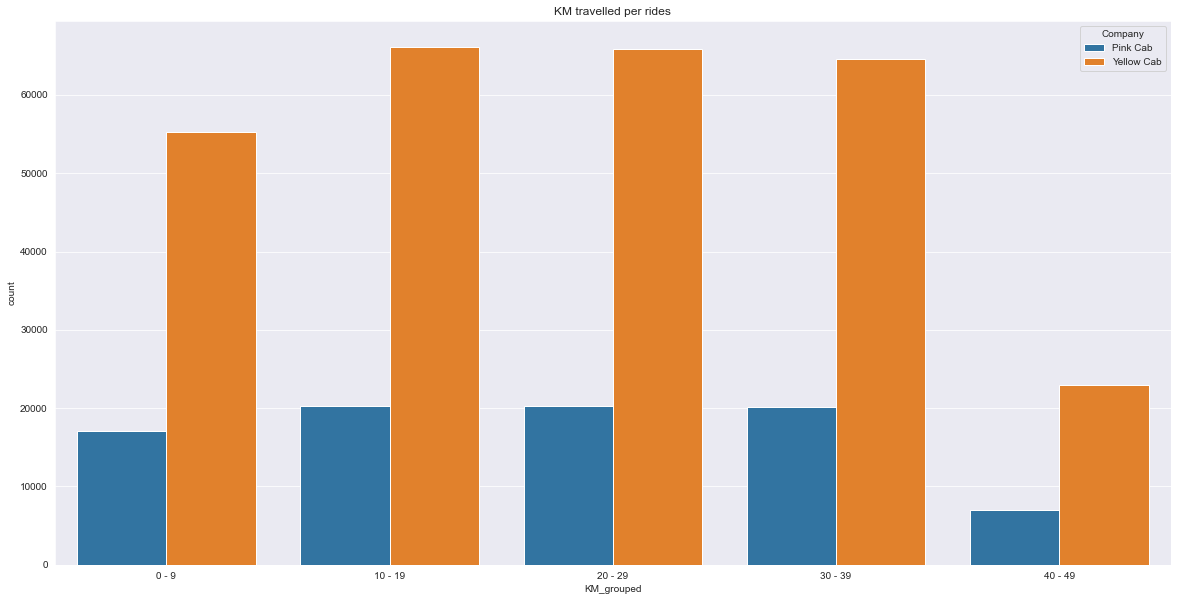

In [72]:
# visualizing the KM counts

plt.figure(figsize=(20,10))
sb.countplot(GlobalData_cab_data['KM_grouped'], hue='Company',data=cab)
# xt = plt.xticks(rotation=70)
plt.title("KM travelled per rides")
plt.show()

Most users take a trip of b/w 10 to 39 km

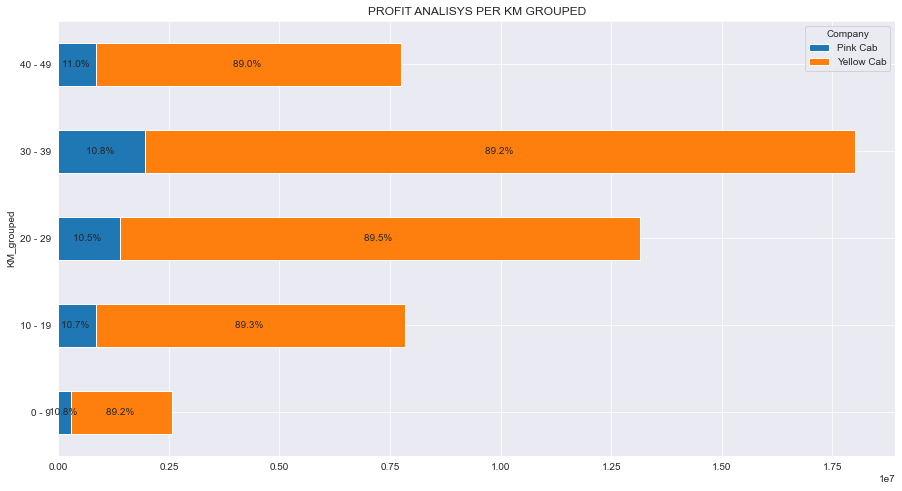

In [73]:
pivot_KM_profit = GlobalData_cab_data.pivot_table(index = ['KM_grouped'], columns = 'Company', values = 'Profit', aggfunc = 'sum')
plot_figure(pivot_KM_profit, "PROFIT ANALISYS PER KM GROUPED",10,15,8)

This chart represents the number of Km travelled registed from yellow cab and Pink cab company.
Most users took a ride of 10 to 30 KM and 76% users choose Yellow cab  and  only 24% travelled with Pink cab company, from where the yellow cab made more profit compared to the other.

<AxesSubplot:ylabel='Profit'>

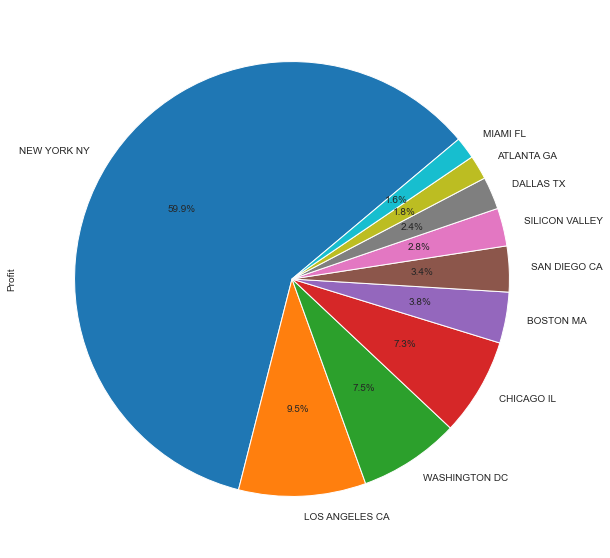

In [74]:
# TOP 10 CITIES WITH THE MOST PROFIT

GlobalData_cab_data.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot(kind='pie',startangle=40,figsize=(15,10),autopct='%1.1f%%')

New York city has 60%  of all the companies profit, it is the city with the highest number of users.

C:\Pyhton 3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


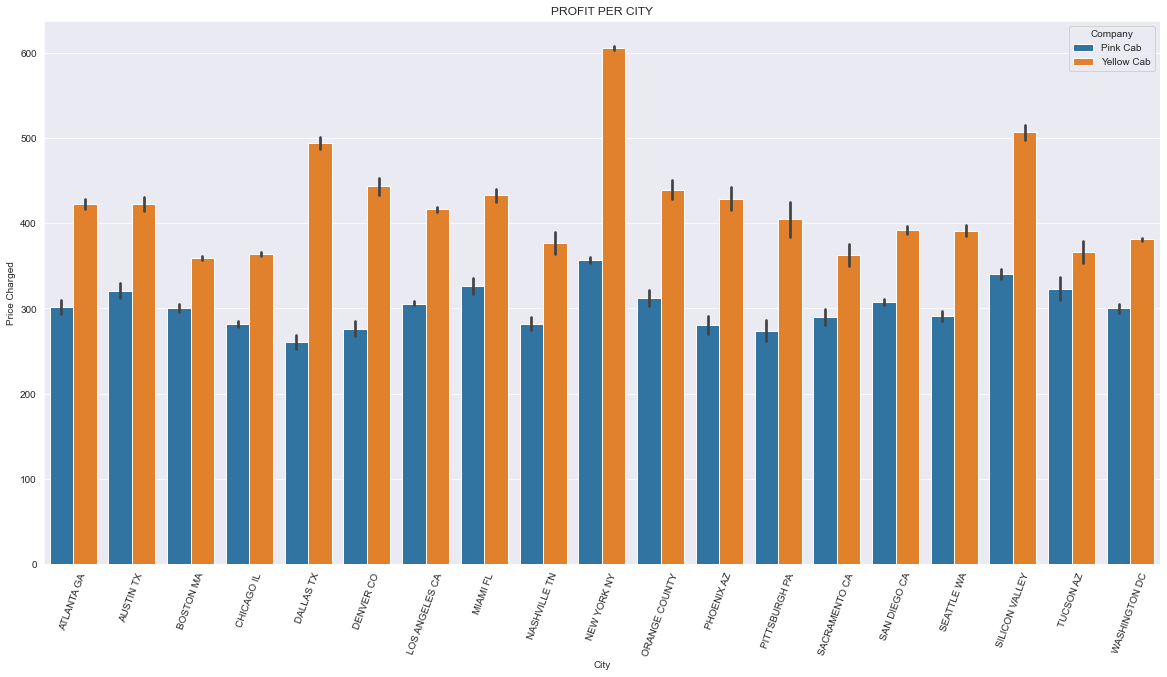

In [75]:
# visualizing the difference between the city and the price charged made by the companies


plt.figure(figsize=(20,10))
sb.barplot(GlobalData_cab_data['City'],GlobalData_cab_data['Price Charged'], hue='Company',data=GlobalData_cab_data)
xt = plt.xticks(rotation=70)
plt.title("PROFIT PER CITY")
plt.show()

Yello Cab company charges higher than the Pink Cab company in all cities, pink Cab profit looks constant and ranges from 290 to 370 while The yellow cab charges higher in populated city in terms of users and has an insonstant profit that ranges wider.

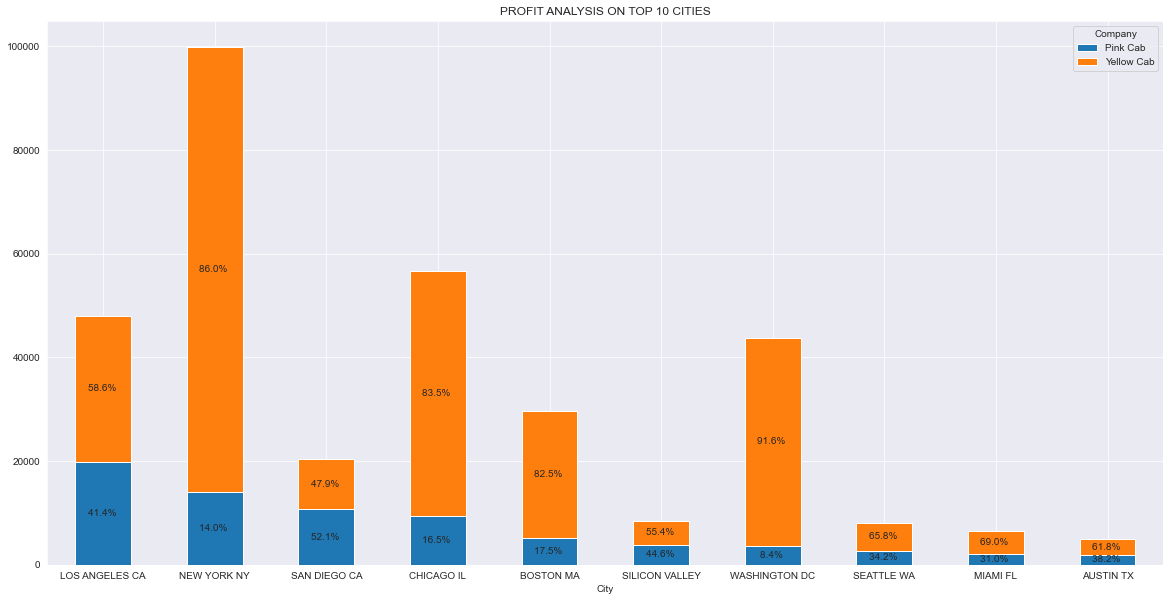

In [76]:
# TOP 10 CITIES IN TERMS OF PROFIT

pivot_city_profit = GlobalData_cab_data.pivot_table(index = ['City'], columns = 'Company', values = 'Profit', aggfunc = 'count')
pivot_city_profit=pivot_city_profit.sort_values("Pink Cab",ascending=False).head(10)
plot_figure2(pivot_city_profit, "PROFIT ANALYSIS ON TOP 10 CITIES",0.45,20,10)


The comapanies made profit from the most populated city in terms of cab users but Yellow cab company made more profit in the top 10 cities with the most users.

<br>

## THE PINK CAB COMPANY DATA

In [88]:
# Pink Cab Profit Margin
Pink_cab_data=GlobalData_cab_data[GlobalData_cab_data['Company']=="Pink Cab"]
Pink_cab_data

Transaction ID  Customer ID Payment_Mode Date of Travel   Company  \
0             10000011        29290         Card     2016-01-08  Pink Cab   
3             10000012        27703         Card     2016-01-06  Pink Cab   
6             10395626        27703         Card     2018-10-27  Pink Cab   
7             10000013        28712         Cash     2016-01-02  Pink Cab   
11            10000014        28020         Cash     2016-01-07  Pink Cab   
...                ...          ...          ...            ...       ...   
359331        10437193        47760         Card     2018-01-05  Pink Cab   
359332        10437278        18620         Card     2018-01-02  Pink Cab   
359333        10437570        14974         Cash     2018-01-05  Pink Cab   
359334        10437576        41135         Card     2018-01-05  Pink Cab   
359335        10437582        39899         Cash     2018-01-05  Pink Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
0           ATLANTA GA         30.45         370.95       313.635    Male   
3           ATLANTA GA         28.62         358.52       334.854    Male   
6           ATLANTA GA         13.39         167.03       141.934    Male   
7           ATLANTA GA          9.04         125.20        97.632    Male   
11          ATLANTA GA         33.17         377.40       351.602    Male   
...                ...           ...            ...           ...     ...   
359331   SACRAMENTO CA         31.03         436.06       344.433    Male   
359332    SAN DIEGO CA         26.73         343.83       304.722    Male   
359333  SILICON VALLEY         22.23         386.13       264.537    Male   
359334       TUCSON AZ         35.96         461.77       381.176  Female   
359335       TUCSON AZ         31.35         350.39       326.040    Male   

        Age  Income (USD/Month)   Profit Age group Income grouped  \
0        28               10813   57.315   20 - 29   7000 - 10000   
3        27                9237   23.666   20 - 29   7000 - 10000   
6        27                9237   25.096   20 - 29   7000 - 10000   
7        53               11242   27.568   50 - 59   7000 - 10000   
11       23               23327   25.798   20 - 29  22000 - 25000   
...     ...                 ...      ...       ...            ...   
359331   47                8823   91.627   40 - 49   7000 - 10000   
359332   27                2876   39.108   20 - 29    2000 - 5000   
359333   51                8020  121.593   50 - 59   7000 - 10000   
359334   24               14269   80.594   20 - 29  12000 - 15000   
359335   59               13512   24.350   50 - 59  12000 - 15000   

       Travel_year_Month  Travel_year  Travel_month KM_grouped  
0                2016-01         2016             1    30 - 39  
3                2016-01         2016             1    20 - 29  
6                2018-10         2018            10    10 - 19  
7                2016-01         2016             1      0 - 9  
11               2016-01         2016             1    30 - 39  
...                  ...          ...           ...        ...  
359331           2018-01         2018             1    30 - 39  
359332           2018-01         2018             1    20 - 29  
359333           2018-01         2018             1    20 - 29  
359334           2018-01         2018             1    30 - 39  
359335           2018-01         2018             1    30 - 39  

[84711 rows x 19 columns]

In [89]:
# Yellow Cab Revenue

PC_income=Pink_cab_data['Profit'].sum()
print("The Income of the Pink cab comapny is : ",round(PC_income,2))

The Income of the Pink cab comapny is :  5307328.32


In [90]:
PC_Gross_margin=(Pink_cab_data['Price Charged'].sum()-Pink_cab_data['Cost of Trip'].sum())/Pink_cab_data['Price Charged'].sum()*100
print("The margin of the Pink cab campany is : ",round(PC_Gross_margin,2))

The margin of the Pink cab campany is :  20.16


In [91]:
# profit per ride
PC_profit_per_ride=Pink_cab_data['Profit'].sum()/len(Pink_cab_data['KM Travelled'])
print(" Pink cab campany Profit per ride is : ",round(PC_profit_per_ride,2))

 Pink cab campany Profit per ride is :  62.65


<br>

## THE YELLOW CAB DATA

In [92]:
# Yellow Cab Profit Margin

Yellow_cab_data=GlobalData_cab_data[GlobalData_cab_data['Company']=="Yellow Cab"]
Yellow_cab_data

Transaction ID  Customer ID Payment_Mode Date of Travel     Company  \
1             10351127        29290         Cash     2018-07-21  Yellow Cab   
2             10412921        29290         Card     2018-11-23  Yellow Cab   
4             10320494        27703         Card     2018-04-21  Yellow Cab   
5             10324737        27703         Cash     2018-05-04  Yellow Cab   
8             10079404        28712         Card     2016-09-21  Yellow Cab   
...                ...          ...          ...            ...         ...   
359387        10439790        38520         Card     2018-01-07  Yellow Cab   
359388        10439799        12490         Cash     2018-01-03  Yellow Cab   
359389        10439838        41414         Card     2018-01-04  Yellow Cab   
359390        10439840        41677         Cash     2018-01-06  Yellow Cab   
359391        10439846        39761         Card     2018-01-04  Yellow Cab   

                  City  KM Travelled  Price Charged  Cost of Trip  Gender  \
1           ATLANTA GA         26.19         598.70      317.4228    Male   
2           ATLANTA GA         42.55         792.05      597.4020    Male   
4           ATLANTA GA         36.38         721.10      467.1192    Male   
5           ATLANTA GA          6.18         138.40       87.5088    Male   
8           ATLANTA GA         39.60         704.30      494.2080    Male   
...                ...           ...            ...           ...     ...   
359387      SEATTLE WA         16.66         261.18      213.9144  Female   
359388  SILICON VALLEY         13.72         277.97      172.8720    Male   
359389       TUCSON AZ         19.00         303.77      232.5600    Male   
359390       TUCSON AZ          5.60          92.42       70.5600    Male   
359391       TUCSON AZ         13.30         244.65      180.3480  Female   

        Age  Income (USD/Month)    Profit Age group Income grouped  \
1        28               10813  281.2772   20 - 29   7000 - 10000   
2        28               10813  194.6480   20 - 29   7000 - 10000   
4        27                9237  253.9808   20 - 29   7000 - 10000   
5        27                9237   50.8912   20 - 29   7000 - 10000   
8        53               11242  210.0920   50 - 59   7000 - 10000   
...     ...                 ...       ...       ...            ...   
359387   42               19417   47.2656   40 - 49  17000 - 20000   
359388   33               18713  105.0980   30 - 39  17000 - 20000   
359389   38                3960   71.2100   30 - 39    2000 - 5000   
359390   23               19454   21.8600   20 - 29  17000 - 20000   
359391   32               10128   64.3020   30 - 39   7000 - 10000   

       Travel_year_Month  Travel_year  Travel_month KM_grouped  
1                2018-07         2018             7    20 - 29  
2                2018-11         2018            11    40 - 49  
4                2018-04         2018             4    30 - 39  
5                2018-05         2018             5      0 - 9  
8                2016-09         2016             9    30 - 39  
...                  ...          ...           ...        ...  
359387           2018-01         2018             1    10 - 19  
359388           2018-01         2018             1    10 - 19  
359389           2018-01         2018             1    10 - 19  
359390           2018-01         2018             1      0 - 9  
359391           2018-01         2018             1    10 - 19  

[274681 rows x 19 columns]

In [93]:
# Yellow Cab Revenue

YC_income=Yellow_cab_data['Profit'].sum()
print("The Income of the Yellow cab comapny is : ",round(YC_income,2))

The Income of the Yellow cab comapny is :  44020373.17


In [94]:
YC_Gross_margin=(Yellow_cab_data['Price Charged'].sum()-Yellow_cab_data['Cost of Trip'].sum())/Yellow_cab_data['Price Charged'].sum()*100
print("The margin of the Yellow cab campany is : ",round(YC_Gross_margin,2))

The margin of the Yellow cab campany is :  34.98


In [95]:
# profit per ride
YC_profit_per_ride=Yellow_cab_data['Profit'].sum()/len(Yellow_cab_data['KM Travelled'])
print(" Yellow cab campany Profit per ride is : ",round(YC_profit_per_ride,2))

 Yellow cab campany Profit per ride is :  160.26


In [97]:
# comparative table

table = [['Company','margin', 'Profit', 'Rides', 'Profit Per Rides'],
        ['Yellow Cab',round(YC_Gross_margin,2),round(YC_income,2),274681, round(YC_profit_per_ride,2)],
        ['Pink cab',round(PC_Gross_margin,2), round(PC_income,2),84711,  round(PC_profit_per_ride,2) ]]


display(HTML(tabulate(table, tablefmt = 'html')))

<br>

# Ending analysis:

I have evaluated both cab companies on the following points and found Yellow cab better than Pink cab:

    -Most Users prefer travelling with Yellow cab than Pink cab
    -Users tarvelled mostly with Yellow cab on short and long distance trip
    -Yellow cab company charged more in populated City which is a good strategy and increase its profit
    -Yellow cab owns 89% of the total profit made by both companies
    -Yellow cab has 90% of total profit each year
    -Yellow cab charged higher than Pink cab

I would advise the XYZ company to invest in Yellow Cab company.